<a href="https://colab.research.google.com/github/LucasSSales/Lista03-Visao-Computacional/blob/main/VC_Lista_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('pip install opencv-python==3.4.2.16'.split())
    subprocess.call('pip install opencv-contrib-python==3.4.2.16'.split())

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import figure
from sklearn.preprocessing import normalize

# QUESTÃO 01

In [52]:
#PEGANDO OS PARES DE IMAGENS

# PANORAMA 01
maki = cv.cvtColor(cv.imread('maki.jpg'), cv.COLOR_BGR2RGB)
maki_l = maki[0:, 0:1200]
maki_r = maki[100:1000, 800:]

# PANORAMA 02
left1 = cv.cvtColor(cv.imread('left1.jpg'), cv.COLOR_BGR2RGB)
right1 = cv.cvtColor(cv.imread('right1.jpg'), cv.COLOR_BGR2RGB)

# PANORAMA 03
left2= cv.cvtColor(cv.imread('left2.jpg'), cv.COLOR_BGR2RGB)
right2 = cv.cvtColor(cv.imread('right2.jpg'), cv.COLOR_BGR2RGB)

In [56]:
def detect_match_warp(img1, img2):
  # usando sift para detecção de features e gerar os descritores
  sift = cv.xfeatures2d.SIFT_create()
  # imagem de base
  kp1, des1 = sift.detectAndCompute(img1,None)
  # imagem que será deformada
  kp2, des2 = sift.detectAndCompute(img2,None)
  # Usando Brute Force com KNN
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des2,des1,k=2)
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  match = cv.drawMatchesKnn(img2,kp2,img1,kp1,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  # realizando o warp da imagem
  src_pts = np.float32([ kp2[m[0].queryIdx].pt for m in good ]).reshape(-1,1,2)
  dst_pts = np.float32([ kp1[m[0].trainIdx].pt for m in good ]).reshape(-1,1,2)
  M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,2.0)
  warp = cv.warpPerspective(img2, M, (img1.shape[1]+img2.shape[1], img1.shape[0]+img2.shape[0]))
  # retornando o warp e os pontos bons
  return match, warp

### PANORAMA 01

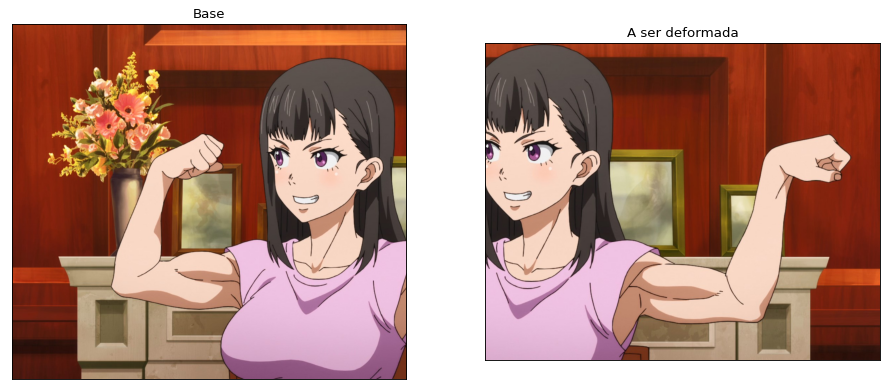

In [63]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121),plt.imshow(maki_l),plt.title('Base')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(maki_r),plt.title('A ser deformada')
plt.xticks([]), plt.yticks([])

plt.show()

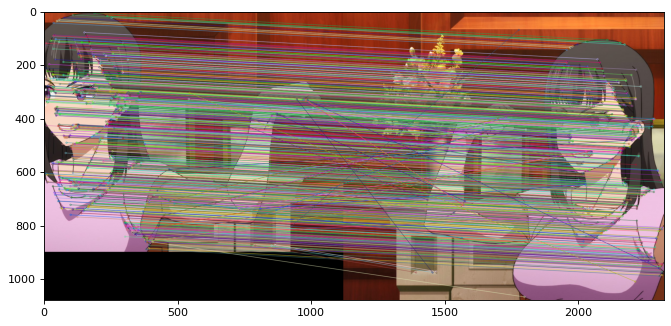

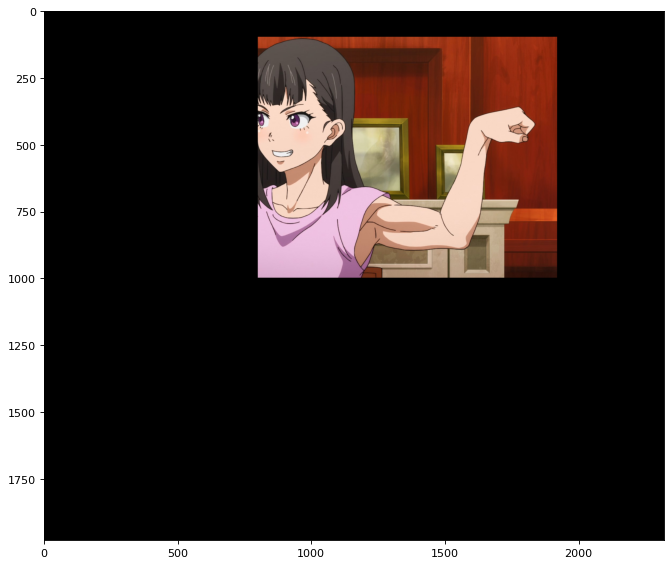

(<matplotlib.image.AxesImage at 0x7f4f1a84bc18>, None)

In [57]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match_maki, warp_maki = detect_match_warp(maki_l, maki_r)
plt.imshow(match_maki),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp_maki),plt.show()

### PANORAMA 02

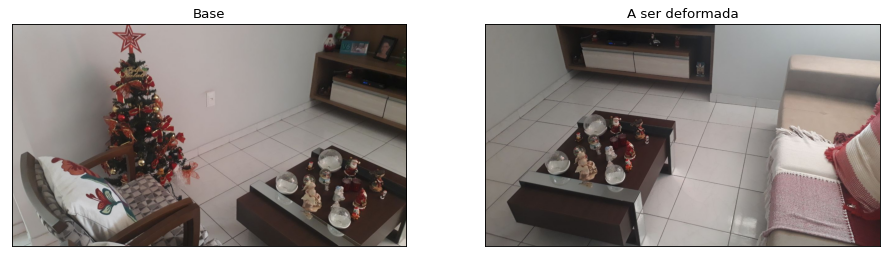

In [64]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121),plt.imshow(left1),plt.title('Base')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(right1),plt.title('A ser deformada')
plt.xticks([]), plt.yticks([])

plt.show()

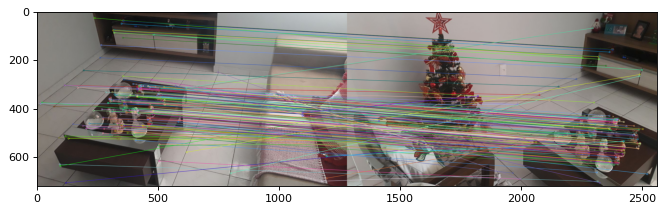

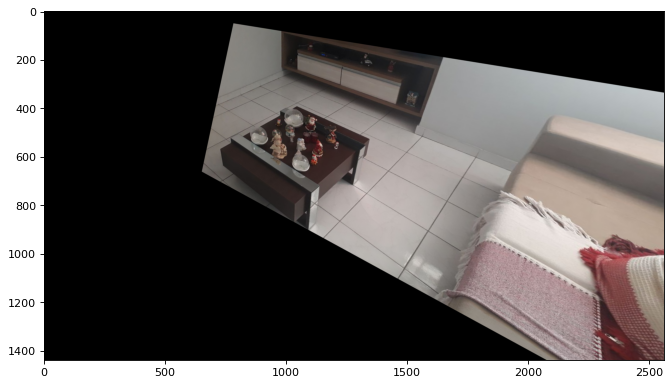

(<matplotlib.image.AxesImage at 0x7f4f1af739b0>, None)

In [50]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match01, warp01 = detect_match_warp(left1, right1)
plt.imshow(match01),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp01),plt.show()

### PANORAMA 03

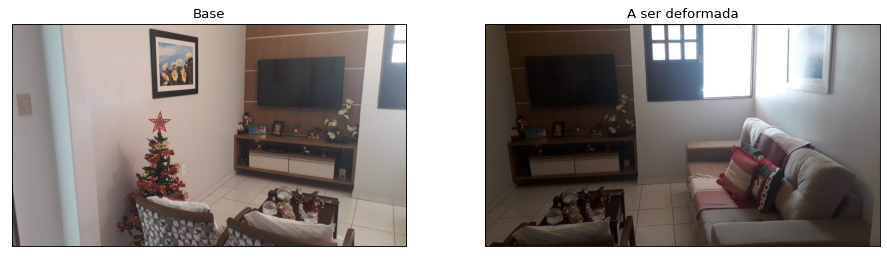

In [66]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121),plt.imshow(left2),plt.title('Base')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(right2),plt.title('A ser deformada')
plt.xticks([]), plt.yticks([])

plt.show()

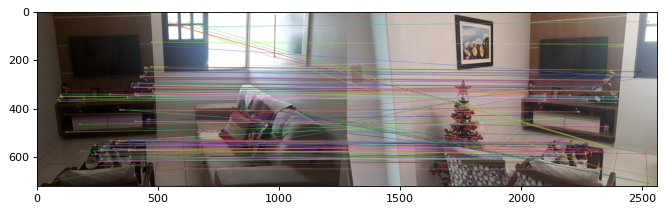

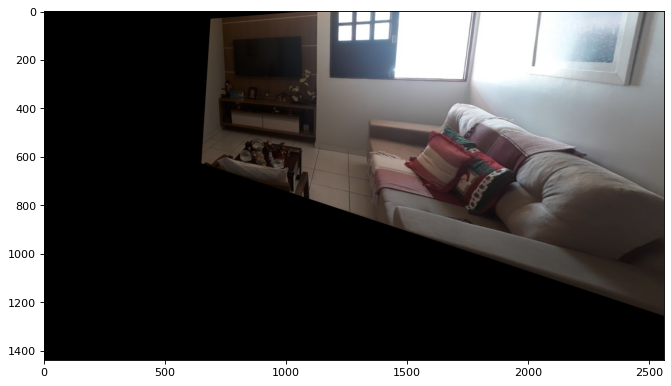

(<matplotlib.image.AxesImage at 0x7f4f1ac19d30>, None)

In [51]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
match02, warp02 = detect_match_warp(left2, right2)
plt.imshow(match02),plt.show()
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(warp02),plt.show()

# QUESTÃO 02

# QUESTÃO 03

# QUESTÃO 04

https://docs.opencv.org/master/dc/d43/tutorial_camera_calibration_square_chess.html

https://docs.opencv.org/master/d4/d94/tutorial_camera_calibration.html

https://docs.opencv.org/master/dc/dbb/tutorial_py_calibration.html